## Importación Datasheet y Data Manipulation

In [3]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import math

In [4]:
matches = pd.read_csv('matches.csv', sep = ',')
matches.head()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (37,73,74,108) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Season,Datetime,Div,Country,League,Referee,HomeTeam,AwayTeam,FTHG,FTAG,...,VCCD,VCCH,VCD,VCH,WHA,WHCA,WHCD,WHCH,WHD,WHH
0,2019/2020,2020-03-11 19:45:00,SC0,Scotland,Premier League,A Muir,St Mirren,Hearts,1,0,...,3.30,3.40,3.3,3.00,2.40,2.20,3.3,3.30,3.3,2.90
1,2019/2020,2020-03-11 17:30:00,D1,Germany,Bundesliga 1,NaN,M'gladbach,FC Koln,2,1,...,3.90,1.95,4.2,1.80,4.00,3.75,3.8,1.91,4.2,1.78
2,2019/2020,2020-03-11 17:00:00,T1,Turkey,Futbol Ligi 1,NaN,Yeni Malatyaspor,Trabzonspor,1,3,...,4.00,3.75,3.7,3.30,2.05,1.83,3.9,3.70,3.7,3.20
3,2019/2020,2020-03-10 19:45:00,E2,England,League 1,S Stockbridge,Blackpool,Tranmere,1,2,...,3.90,1.65,3.8,1.67,5.00,5.25,3.7,1.67,3.8,1.67
4,2019/2020,2020-03-10 19:45:00,EC,England,Conference,J Bell,Woking,Barnet,1,3,...,3.25,2.80,3.3,2.80,2.55,2.60,3.2,2.70,3.3,2.70


**Selecciono las columnas más útiles para el posterior análisis**

- Season
- Country
- League
- HomeTeam
- AwayTeam
- FTHG - Full Time Home Goals
- FTAG - Full Time Away Goals
- FTR - Full Time Result
- HTHG - Half Time Home Goals
- HTAG - Half Time Away Goals
- HTR - Half Time Results

In [5]:
matches = matches[["Season","Country","League","HomeTeam","AwayTeam","FTHG", "FTAG", "FTR", "HTHG", "HTAG", "HTR"]]
matches.head()

,Season,Country,League,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,2019/2020,Scotland,Premier League,St Mirren,Hearts,1,0,H,0,0,D
1,2019/2020,Germany,Bundesliga 1,M'gladbach,FC Koln,2,1,H,1,0,H
2,2019/2020,Turkey,Futbol Ligi 1,Yeni Malatyaspor,Trabzonspor,1,3,A,1,2,A
3,2019/2020,England,League 1,Blackpool,Tranmere,1,2,A,0,2,A
4,2019/2020,England,Conference,Woking,Barnet,1,3,A,0,1,A


In [7]:
matches.shape

(177764, 11)

In [8]:
matches.isnull().sum()

Season          0
Country         0
League          0
HomeTeam     1046
AwayTeam     1046
FTHG            0
FTAG            0
FTR             4
HTHG            0
HTAG            0
HTR         33462
dtype: int64

**Trabajaremos nuestro estudio sobre la Liga Primera División en España.**

In [9]:
matches_spain = matches[(matches["League"] == "La Liga Primera Division")]
matches_spain.head()

,Season,Country,League,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
17,2019/2020,Spain,La Liga Primera Division,Eibar,Sociedad,1,2,A,0,1,A
43,2019/2020,Spain,La Liga Primera Division,Betis,Real Madrid,2,1,H,1,1,D
49,2019/2020,Spain,La Liga Primera Division,Villarreal,Leganes,1,2,A,1,0,H
65,2019/2020,Spain,La Liga Primera Division,Levante,Granada,1,1,D,1,0,H
85,2019/2020,Spain,La Liga Primera Division,Valladolid,Ath Bilbao,1,4,A,0,2,A


**Para nuestro estudio posterior, añadimos columna con el Total Goles en cada partido.**

In [10]:
# Añadimos numero de goles totales a nuestro dataset de Worldcup

matches_spain["total_goals"] = matches_spain["FTHG"] + matches_spain["FTAG"]

matches_spain.head()

<ipython-input-10-d46dfb25bcbd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_spain["total_goals"] = matches_spain["FTHG"] + matches_spain["FTAG"]


,Season,Country,League,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,total_goals
17,2019/2020,Spain,La Liga Primera Division,Eibar,Sociedad,1,2,A,0,1,A,3
43,2019/2020,Spain,La Liga Primera Division,Betis,Real Madrid,2,1,H,1,1,D,3
49,2019/2020,Spain,La Liga Primera Division,Villarreal,Leganes,1,2,A,1,0,H,3
65,2019/2020,Spain,La Liga Primera Division,Levante,Granada,1,1,D,1,0,H,2
85,2019/2020,Spain,La Liga Primera Division,Valladolid,Ath Bilbao,1,4,A,0,2,A,5


## Summarizing Quantitative Data - Measuring center

### Total - ¿Cuántos goles se han marcado en cada temporada?

In [11]:
season_goals_total = matches_spain.groupby('Season').total_goals.sum()
print(season_goals_total)

Season
2000/2001    1095
2001/2002     961
2002/2003    1016
2003/2004    1015
2004/2005     693
2005/2006     936
2006/2007     942
2007/2008    1021
2008/2009    1101
2009/2010    1031
2010/2011    1042
2011/2012    1050
2012/2013    1091
2013/2014    1045
2014/2015    1009
2015/2016    1043
2016/2017    1118
2017/2018    1024
2018/2019     983
2019/2020     685
Name: total_goals, dtype: int64


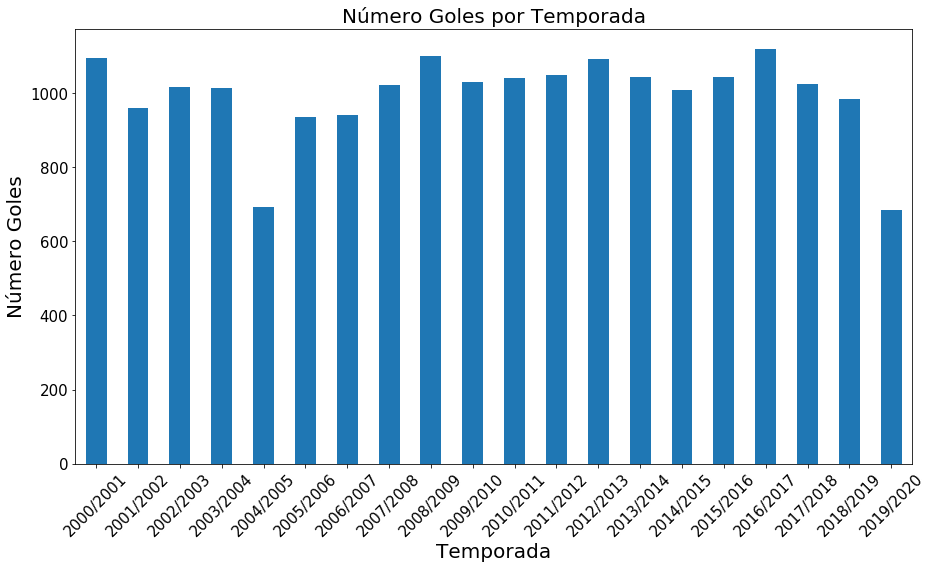

In [12]:
plt.figure(figsize = (15,8))

ax = season_goals_total.plot(kind = 'bar')
ax.set_title('Número Goles por Temporada', fontsize = 20)
ax.set_xlabel('Temporada', fontsize = 20)
ax.set_ylabel('Número Goles', fontsize = 20)
plt.xticks(fontsize = 15, rotation = 45)
plt.yticks(fontsize = 15)
plt.show()

### Mean   - ¿Cuál es la media de goles por partido desde temporada 1999/2000 hasta temporada 2019/2020?

**Mean or Average is calculated as sum of all numbers in the dataset and dividing by the total number of values.**

In [13]:
total_goals_mean = matches_spain.total_goals.mean()
print("La media de goles por partido es: ", round(total_goals_mean,2))

La media de goles por partido es:  2.7


### Median - ¿Cuál es la mediana de goles por partido desde temporada 1999/2000 hasta 2019/2020?

In [14]:
season_goals_median = matches_spain.total_goals.median()
print("La mediana de goles por partido es: ", season_goals_median)

La mediana de goles por partido es:  3.0


Vemos como la mediana es ligeramente superior a la media, ya que no se ve afectada por los valores extremos o outliers

### Mode - ¿Cuál es el número total de goles que más se repite en un partido?

In [15]:
season_goals_mode = matches_spain.total_goals.mode()
print("El número total de goles que más se repite, o moda, es: ", season_goals_mode)

El número total de goles que más se repite, o moda, es:  0    2
dtype: int64


(El resultado sería 2 goles por partido, no sé por qué me sale ese 0 delante).

## Summarizing Quantitative data - Measuring Spread

Tras haber repasado cómo de centrado están los valores relativos al número de goles, vamos a revisar cómo están de dispersos dichos valores.

### Range - ¿Cuál es la diferencia entre el partido con mayor y menor número de goles?

In [16]:
total_goals_max = matches_spain.total_goals.max()
total_goals_min = matches_spain.total_goals.min()
total_goals_range = total_goals_max - total_goals_min

print("Mayor número de goles en un partido: ", total_goals_max)
print("Menor número de goles en un partido: ", total_goals_min)
print("Diferencia de goles entre partido con mayor número de goles y menos: ", total_goals_range)


Mayor número de goles en un partido:  12
Menor número de goles en un partido:  0
Diferencia de goles entre partido con mayor número de goles y menos:  12


### Percentiles

In [17]:
np.percentile(matches_spain.total_goals, [25, 50, 75])

array([1., 3., 4.])

- 25th percentile = 1 → 25% de los partidos han tenido menos de 1 gol.
- 75th percentile = 4 → 75% de los partidos han tenido menos de 4 goles.

### Boxplot

Visualizaremos en un gráfico las diferentes métricas que hemos obtenido relativas al total de número de goles desde la temporada 1999/2000 hasta la actualidad.

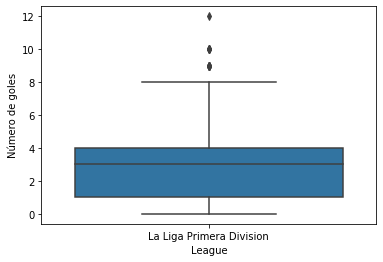

In [18]:
import seaborn as sns

_ = sns.boxplot(x = 'League', y = 'total_goals', data = matches_spain)
_ = plt.ylabel('Número de goles')
plt.show()

### Standard Deviation

In [19]:
round(np.std(matches_spain.total_goals),2)

1.69

- La media del total de goles (2.7) tiene una desviación estándar de 1.69.
- Es decir la dispersión del número total de goles será 2.7  ±  1.69

### Histograma - Distribución de goles por partido

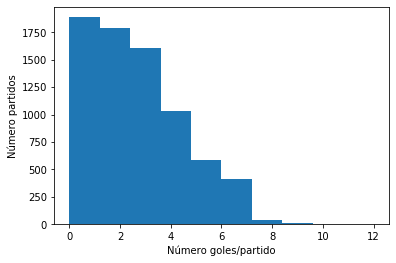

In [20]:
_ = plt.hist(matches_spain['total_goals'])
_ = plt.xlabel('Número goles/partido')
_ = plt.ylabel('Número partidos')
plt.show()

## Análisis Goles Equipo Local vs Goles Equipo Visitante

### Mean - Goles Equipo Local vs Goles Equipo Visitante

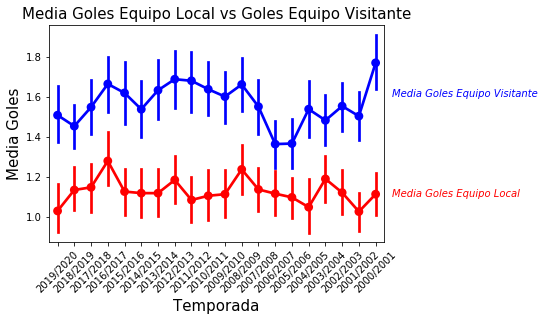

In [21]:
sns.pointplot(x=matches_spain.Season, y=matches_spain.FTHG, data=matches_spain, color='blue', alpha=0.8)
sns.pointplot(x=matches_spain.Season, y=matches_spain.FTAG, data=matches_spain, color='red', alpha=0.8)

plt.text(20,1.1,'Media Goles Equipo Local',color='red',fontsize = 10,style = 'italic')
plt.text(20,1.6,'Media Goles Equipo Visitante',color='blue',fontsize = 10,style = 'italic')

plt.xlabel('Temporada',fontsize = 15)
plt.xticks(rotation=45)

plt.ylabel('Media Goles',fontsize = 15)

plt.title('Media Goles Equipo Local vs Goles Equipo Visitante',fontsize = 15)

plt.show()

**Gráficamente, vemos como la media de goles de los equipos que juegan como local ha sido superior a la media de goles de los equipos que juegan como visitante**

### Correlación

In [22]:
matches_spain.corr()

,FTHG,FTAG,HTHG,HTAG,total_goals
FTHG,1.000000,-0.050374,0.688846,-0.002941,0.746045
FTAG,-0.050374,1.000000,-0.039938,0.689239,0.627469
HTHG,0.688846,-0.039938,1.000000,-0.023808,0.510417
HTAG,-0.002941,0.689239,-0.023808,1.000000,0.457252
total_goals,0.746045,0.627469,0.510417,0.457252,1.000000


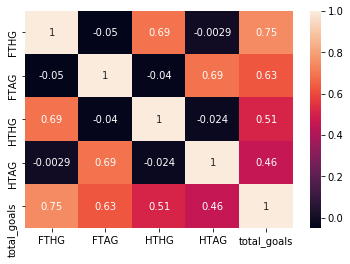

In [23]:
sns.heatmap(matches_spain.corr(),annot=True)
plt.show()

**Vemos como la correlación entre el número de goles marcados como equipo local (FTHG) y el total de goles es mayor que la correlación entre goles marcados como equipo visitante (FTAG( y el total de goles.**

### Coeficiente Correlación Pearson - Goles Local / Goles Totales

In [24]:
corr_mat = np.corrcoef(matches_spain.FTHG, matches_spain.total_goals)

r_pearson = corr_mat[0,1]
print(round(r_pearson,2))

0.75


## Hypothesis Testing - ¿Equipo local gana el partido si en el descanso va empatando o perdiendo?

Estamos viendo que los equipos que juegan como local marcan más goles. Queremos saber cómo de importante es jugar en casa de cara a remontar un partido, es decir, si al descanso va empate o perdiendo, cómo influye jugar en casa para terminar ganando al final del partido gracias al empuje adicional que pueden darte tus aficionados.

**Null Hypothesis - Jugar como equipo local es indiferente de cara a ganar el partido si al descanso va perdiendo o empatando.**

In [25]:
matches_spain['home_team_win_HT'] = np.zeros
matches_spain['home_team_win_FT'] = np.zeros

# Half Time

#WIN
matches_spain['home_team_win_HT'].loc[matches_spain['HTHG'] > matches_spain['HTAG']] = 1
#LOSS
matches_spain['home_team_win_HT'].loc[matches_spain['HTHG'] < matches_spain['HTAG']] = 0
#TIE
matches_spain['home_team_win_HT'].loc[matches_spain['HTHG'] == matches_spain['HTAG']] = 0

# Full Time

#WIN
matches_spain['home_team_win_FT'].loc[matches_spain['FTHG'] < matches_spain['FTAG']] = 1
#LOSS
matches_spain['home_team_win_FT'].loc[matches_spain['FTHG'] > matches_spain['FTAG']] = 0
#TIE
matches_spain['home_team_win_FT'].loc[matches_spain['FTHG'] == matches_spain['FTAG']] = 0

matches_spain.head()

<ipython-input-25-2f466fedcde2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_spain['home_team_win_HT'] = np.zeros
<ipython-input-25-2f466fedcde2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_spain['home_team_win_FT'] = np.zeros
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/

,Season,Country,League,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,total_goals,home_team_win_HT,home_team_win_FT
17,2019/2020,Spain,La Liga Primera Division,Eibar,Sociedad,1,2,A,0,1,A,3,0,1
43,2019/2020,Spain,La Liga Primera Division,Betis,Real Madrid,2,1,H,1,1,D,3,0,0
49,2019/2020,Spain,La Liga Primera Division,Villarreal,Leganes,1,2,A,1,0,H,3,1,1
65,2019/2020,Spain,La Liga Primera Division,Levante,Granada,1,1,D,1,0,H,2,1,0
85,2019/2020,Spain,La Liga Primera Division,Valladolid,Ath Bilbao,1,4,A,0,2,A,5,0,1


In [26]:
alpha = 0.05

In [27]:
home_goals_ht = matches_spain.home_team_win_HT
away_goals_ft = matches_spain.home_team_win_FT

ttest, pval = sp.stats.ttest_rel(home_goals_ht, away_goals_ft)
ttest, pval

(8.805084223306038, 1.6090314112029296e-18)

- Como pvalue < 0.05 podemos rechazar la Null Hypothesis, por tanto rechazamos que el hecho de jugar como equipo local sea indiferente de cara a ganar el partido cuando al descanso iba perdiendo o empatando.
- Dicho de otra manera, jugar como equipo local beneficia para ganar el partido si al descanso vas empatando o perdiendo.